## Finding Relationship between Parental Rating and Box Office Earnings

In [100]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [101]:
df_movie_info = pd.read_csv('data/rt.movie_info.tsv.gz', sep='\t')

## Total Number of Ratings in Dataset

In [102]:
df_movie_info['box_office'] = df_movie_info['box_office'].str.replace(',','').astype(float)

# Drop NA values from Box Office Earnings and No Rating Sorted Top to Bottom

This decision was made because we are looking for the relationship between parental rating and box office earnings. 
Rows with no box office data or parental rating are of no use.

In [103]:
df_dropped_na = df_movie_info.dropna(subset=['box_office'])
df_dropped_na = df_dropped_na[df_dropped_na.rating != 'NR']

df_dropped_na = df_dropped_na.sort_values('box_office',ascending=False)

# Percent of Films with Parental Rating and Box Office Info

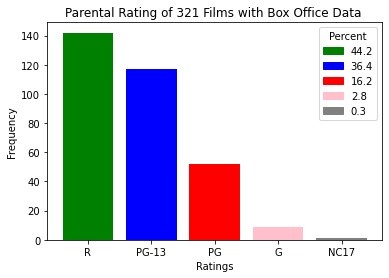

In [104]:

fig , ax = plt.subplots()
x = list(df_dropped_na.value_counts('rating').index)
height = list(df_dropped_na.value_counts('rating'))
color = ['green','blue','red','pink', 'grey', 'black']

ax.bar(x = x ,height = height,color=color)

ax.set_title('Parental Rating of 321 Films with Box Office Data ')
ax.set_xlabel('Ratings')
ax.set_ylabel('Frequency')
colors = {round((height[val]/len(df_dropped_na))*100,1) : color[val] for val in range(0,len(height))}         
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
plt.legend(handles, labels, title='Percent');

This shows the total distribution of ratings amongst the dataset, with the R category coming in first place. 

# Percent of Films Top 105 Grossing in Box Office

Here we are trying to get a quick look at what has previously done well in the box office. The data shows that the PG-13 rating tops the box office 
earnings by about 50%.

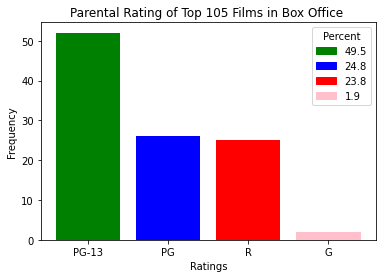

In [105]:
df_dropped_top_105 = df_dropped_na.sort_values('box_office',ascending=False).head(105)


fig , ax = plt.subplots()
x = list(df_dropped_top_105.value_counts('rating').index)
height = list(df_dropped_top_105.value_counts('rating'))
color = ['green','blue','red','pink', 'grey', 'black']

ax.bar(x = x ,height = height,color=color)


ax.set_title('Parental Rating of Top 105 Films in Box Office ')
ax.set_xlabel('Ratings')
ax.set_ylabel('Frequency')
colors = {round((height[val]/len(df_dropped_top_105))*100,1) : color[val] for val in range(0,len(height))}         
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
plt.legend(handles, labels, title='Percent');


# Percent of Films in Bottom 105 Grossing in Box Office 

Now we are doing the opposite of what was done above. We are trying to get a quick look at
what has performed poorly in the box office. 
The data shows that the R rating takes 63% of the bottom.

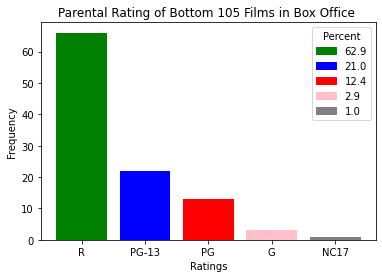

In [106]:
df_dropped_bottom_105 = df_dropped_na.sort_values('box_office').head(105)


fig , ax = plt.subplots()
x = list(df_dropped_bottom_105.value_counts('rating').index)
height = list(df_dropped_bottom_105.value_counts('rating'))
color = ['green','blue','red','pink', 'grey', 'black']

ax.bar(x = x ,height = height,color=color)


ax.set_title('Parental Rating of Bottom 105 Films in Box Office ')
ax.set_xlabel('Ratings')
ax.set_ylabel('Frequency')
colors = {round((height[val]/len(df_dropped_bottom_105))*100,1) : color[val] for val in range(0,len(height))}         
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
plt.legend(handles, labels, title='Percent');


# Parental Rating of Movies Earning Above 40 Million (The Average)

It is no surprise that the PG-13 category performs the best on above average earnings in the box office. The R rating comes in third.   

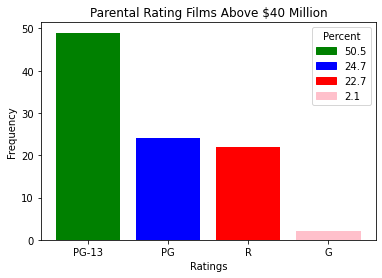

In [107]:
df_dropped_na = df_dropped_na.sort_values('box_office',ascending=False)
filtered = df_dropped_na[df_dropped_na['box_office'] >= 40000000]

fig , ax = plt.subplots()
x = list(filtered.value_counts('rating').index)
height = list(filtered.value_counts('rating'))
color = ['green','blue','red','pink', 'grey', 'black']

ax.bar(x = x ,height = height,color=color)


ax.set_title('Parental Rating Films Above $40 Million')
ax.set_xlabel('Ratings')
ax.set_ylabel('Frequency')
colors = {round((height[val]/len(filtered))*100,1) : color[val] for val in range(0,len(height))}         
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
plt.legend(handles, labels, title='Percent');


# Parental Rating of Movies Earning Between 15 to 40 Million

Here we are surprised at our findings. The R rating takes comes in first at almost 50%, while the PG-13 rating trails far behind at 33.5%

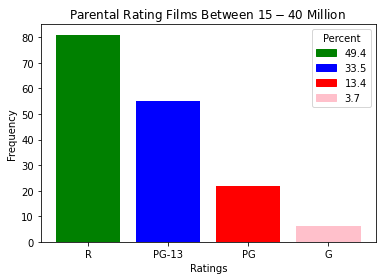

In [108]:
filtered = df_dropped_na[(df_dropped_na['box_office'] < 40000000) & (df_dropped_na['box_office'] >= 1500000)]

fig , ax = plt.subplots()
x = list(filtered.value_counts('rating').index)
height = list(filtered.value_counts('rating'))
color = ['green','blue','red','pink', 'grey', 'black']

ax.bar(x = x ,height = height,color=color)


ax.set_title('Parental Rating Films Between $15-$40 Million ')
ax.set_xlabel('Ratings')
ax.set_ylabel('Frequency')
colors = {round((height[val]/len(filtered))*100,1) : color[val] for val in range(0,len(height))}         
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
plt.legend(handles, labels, title='Percent');


# Parental Rating of Movies Earning Below 15 Million

Earning in the bottom range, the R rating dominates this category at almost 60%. PG-13 comes in at a far second with 24%.

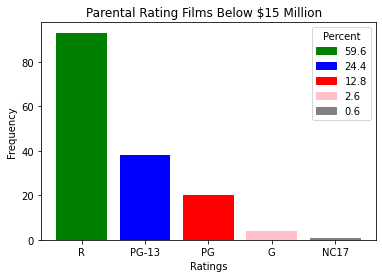

In [109]:
filtered = df_dropped_na[df_dropped_na['box_office'] < 15000000]

fig , ax = plt.subplots()
x = list(filtered.value_counts('rating').index)
height = list(filtered.value_counts('rating'))
color = ['green','blue','red','pink', 'grey', 'black']

ax.bar(x = x ,height = height,color=color)


ax.set_title('Parental Rating Films Below $15 Million  ')
ax.set_xlabel('Ratings')
ax.set_ylabel('Frequency')
colors = {round((height[val]/len(filtered))*100,1) : color[val] for val in range(0,len(height))}         
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
plt.legend(handles, labels, title='Percent');


# Findings and Recommendations

From the data we were given, our recommendation is to make a movie with the PG-13 rating. Although the R rating is the most common in our dataset, the data shows it does not provide the strongest return. With the idea in mind we want our movie to perform well in the box office, the PG-13 rating has the highest chance to perform above average while having a lower chance of ending up in the bottom earnings at the box office. 